In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.0'

## Objective: To create a LSTM network and predict a stock price with multivariate data

In [3]:
import pandas_datareader as pdr
import pandas as pd
import datetime as dt
from datetime import datetime

In [4]:
key = "7d330fa19a4322f49491b39c0997502b7380e68"

In [5]:
ticker = "GOOG" # We are using the Google stock

In [6]:
data = pdr.get_data_tiingo(ticker,api_key=key)

In [7]:
data.to_csv("google_Stock.csv")

### We have used tiingo and pulled the data for google stock and saved it in csv format

In [8]:
df = pd.read_csv('google_Stock.csv')

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-02-29 00:00:00+00:00,697.77,710.89,697.68,700.32,2481145,697.77,710.89,697.68,700.32,2481145,0.0,1.0
1,GOOG,2016-03-01 00:00:00+00:00,718.81,718.81,699.77,703.62,2151419,718.81,718.81,699.77,703.62,2151419,0.0,1.0
2,GOOG,2016-03-02 00:00:00+00:00,718.85,720.00,712.00,719.00,1629003,718.85,720.00,712.00,719.00,1629003,0.0,1.0
3,GOOG,2016-03-03 00:00:00+00:00,712.42,719.45,706.02,718.68,1957974,712.42,719.45,706.02,718.68,1957974,0.0,1.0
4,GOOG,2016-03-04 00:00:00+00:00,710.89,716.49,706.02,714.99,1972077,710.89,716.49,706.02,714.99,1972077,0.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1259 non-null   object 
 1   date         1259 non-null   object 
 2   close        1259 non-null   float64
 3   high         1259 non-null   float64
 4   low          1259 non-null   float64
 5   open         1259 non-null   float64
 6   volume       1259 non-null   int64  
 7   adjClose     1259 non-null   float64
 8   adjHigh      1259 non-null   float64
 9   adjLow       1259 non-null   float64
 10  adjOpen      1259 non-null   float64
 11  adjVolume    1259 non-null   int64  
 12  divCash      1259 non-null   float64
 13  splitFactor  1259 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.8+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1259.0,1.127137e+03,298.402149,668.260,9.212850e+02,1101.16,1261.880,2128.31
high,1259.0,1.137438e+03,302.666381,672.300,9.264450e+02,1111.77,1269.180,2152.68
low,1259.0,1.115862e+03,293.871218,663.284,9.138915e+02,1089.78,1244.315,2104.36
open,1259.0,1.126187e+03,297.538791,671.000,9.218500e+02,1102.09,1253.215,2119.27
volume,1259.0,1.625615e+06,709039.023676,346753.000,1.190922e+06,1446453.00,1832502.000,6207027.00
adjClose,1259.0,1.127137e+03,298.402149,668.260,9.212850e+02,1101.16,1261.880,2128.31
adjHigh,1259.0,1.137438e+03,302.666383,672.300,9.264450e+02,1111.77,1269.180,2152.68
adjLow,1259.0,1.115862e+03,293.871226,663.284,9.138915e+02,1089.78,1244.315,2104.36
adjOpen,1259.0,1.126187e+03,297.538791,671.000,9.218500e+02,1102.09,1253.215,2119.27
adjVolume,1259.0,1.625615e+06,709039.023676,346753.000,1.190922e+06,1446453.00,1832502.000,6207027.00


In [12]:
df.shape

(1259, 14)

In [13]:
df['date'].min()

'2016-02-29 00:00:00+00:00'

In [14]:
df['date'].max()

'2021-02-26 00:00:00+00:00'

### From the date column we've got the data from 2016 Feb to 2021 Feb

In [15]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

### No Null Values

In [16]:
datelist_train = pd.to_datetime(df['date'])

In [17]:
datelist_train[0:5]

0   2016-02-29 00:00:00+00:00
1   2016-03-01 00:00:00+00:00
2   2016-03-02 00:00:00+00:00
3   2016-03-03 00:00:00+00:00
4   2016-03-04 00:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]

### Importing Required Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

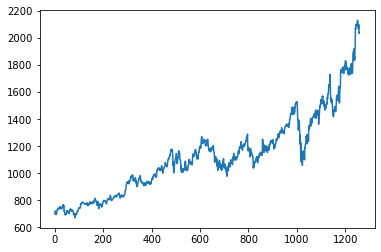

In [20]:
plt.plot(df['close'])

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

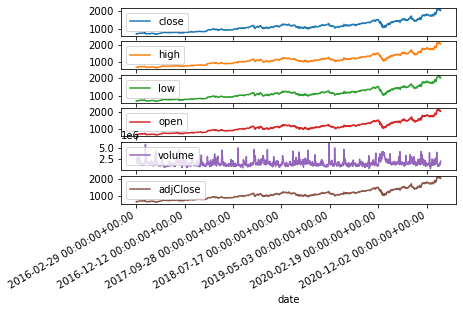

In [21]:
df.set_index('date')[['close', 'high', 'low', 'open', 'volume', 'adjClose']].plot(subplots=True)

### We are using 6 columns to predict the closing value of the stock which is represented by column - 'close'

In [22]:
cols = list(df)[2:8]
cols

['close', 'high', 'low', 'open', 'volume', 'adjClose']

In [23]:
df[cols]

,close,high,low,open,volume,adjClose
0,697.77,710.8900,697.68,700.32,2481145,697.77
1,718.81,718.8100,699.77,703.62,2151419,718.81
2,718.85,720.0000,712.00,719.00,1629003,718.85
3,712.42,719.4500,706.02,718.68,1957974,712.42
4,710.89,716.4900,706.02,714.99,1972077,710.89
...,...,...,...,...,...,...
1254,2064.88,2091.4200,2062.14,2067.00,1349856,2064.88
1255,2070.86,2082.0100,2002.02,2025.01,1667377,2070.86
1256,2095.17,2100.7800,2038.13,2041.83,1248349,2095.17
1257,2031.36,2094.8800,2021.29,2067.45,1761201,2031.36


In [24]:
df_for_training = df[cols].astype(float)

In [25]:
df_for_training.head()

,close,high,low,open,volume,adjClose
0,697.77,710.89,697.68,700.32,2481145.0,697.77
1,718.81,718.81,699.77,703.62,2151419.0,718.81
2,718.85,720.00,712.00,719.00,1629003.0,718.85
3,712.42,719.45,706.02,718.68,1957974.0,712.42
4,710.89,716.49,706.02,714.99,1972077.0,710.89


<AxesSubplot:>

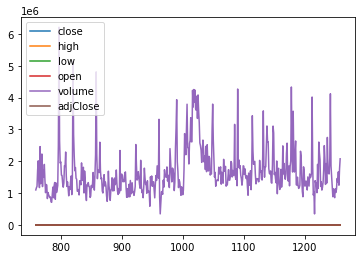

In [26]:
df_for_plot=df_for_training.tail(500)
df_for_plot.plot.line()

### Normalizing the Data: Using MinMaxScaler and scaling the data within range (0,1)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [30]:
features = df_for_training_scaled
target = df_for_training_scaled[:,0]

In [31]:
features[0:5]

array([[0.02021164, 0.02606763, 0.02386828, 0.02024484, 0.36421369,
        0.02021164],
       [0.0346221 , 0.03141761, 0.02531858, 0.02252342, 0.30794908,
        0.0346221 ],
       [0.0346495 , 0.03222146, 0.0338053 , 0.03314299, 0.21880376,
        0.0346495 ],
       [0.03024554, 0.03184993, 0.02965562, 0.03292204, 0.27493953,
        0.03024554],
       [0.02919763, 0.02985044, 0.02965562, 0.03037417, 0.27734608,
        0.02919763]])

### Creating Time Series data by using Timeseries Generator

In [32]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [33]:
TimeseriesGenerator(features, target, length=3, sampling_rate=1, batch_size=1)[0]

(array([[[0.02021164, 0.02606763, 0.02386828, 0.02024484, 0.36421369,
          0.02021164],
         [0.0346221 , 0.03141761, 0.02531858, 0.02252342, 0.30794908,
          0.0346221 ],
         [0.0346495 , 0.03222146, 0.0338053 , 0.03314299, 0.21880376,
          0.0346495 ]]]),
 array([0.03024554]))

### Splitting the data into Training set and Testing set without shuffling - so that the data remains in sequential manner. It's important to give shuffle as false otherwise the data will be splitted randomly

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=101,shuffle=False)

In [36]:
X_train.shape

(944, 6)

In [37]:
X_test.shape

(315, 6)

### We are going to use the past 90 days and predict the next 30 days. Hence we create our datasets with that format. These values are quite experimental - we can use the past 120 or more days and predict the next 30 days or more as per our requirement

In [38]:
win_length=90
batch_size=30
num_features=6
train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

### We've created Train data and Test data in time series format using Time series Generator

In [39]:
train_generator[0]

(array([[[0.02021164, 0.02606763, 0.02386828, 0.02024484, 0.36421369,
          0.02021164],
         [0.0346221 , 0.03141761, 0.02531858, 0.02252342, 0.30794908,
          0.0346221 ],
         [0.0346495 , 0.03222146, 0.0338053 , 0.03314299, 0.21880376,
          0.0346495 ],
         ...,
         [0.0211979 , 0.01915049, 0.02001706, 0.01463815, 0.17029187,
          0.0211979 ],
         [0.01796514, 0.01664438, 0.01776173, 0.0173034 , 0.1904114 ,
          0.01796514],
         [0.02021164, 0.01984626, 0.01790745, 0.01310529, 0.18176147,
          0.02021164]],
 
        [[0.0346221 , 0.03141761, 0.02531858, 0.02252342, 0.30794908,
          0.0346221 ],
         [0.0346495 , 0.03222146, 0.0338053 , 0.03314299, 0.21880376,
          0.0346495 ],
         [0.03024554, 0.03184993, 0.02965562, 0.03292204, 0.27493953,
          0.03024554],
         ...,
         [0.01796514, 0.01664438, 0.01776173, 0.0173034 , 0.1904114 ,
          0.01796514],
         [0.02021164, 0.01984626, 0.017

### Importing required Deep Learning Libraries:

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

### Creating Model

In [41]:
model = Sequential()
# Adding 1st LSTM Layer
model.add(LSTM(128, input_shape = (win_length, num_features),return_sequences = True))
model.add(LeakyReLU(alpha=0.5)) 

# Adding 2nd LSTM layer
model.add(LSTM(128,return_sequences=True))
model.add(LeakyReLU(alpha=0.5)) 

# Adding Dropout
model.add(Dropout(0.3))

# Adding 3rd LSTM layer
model.add(LSTM(64,return_sequences=False))

# Adding Dropout
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1))

# Compiling the Neural Network
model.compile(optimizer = 'adam', loss="mse",metrics = ['mae'])


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 90, 128)           69120     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 90, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 90, 128)           131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 90, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

### We are using early stopping callback to avoid overfitting

In [43]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [44]:
history = model.fit(train_generator,epochs=50,callbacks=[early_stop],validation_data=test_generator,shuffle=False)

Epoch 1/50
29/29 [==============================] - 23s 490ms/step - loss: 0.0031 - mae: 0.0458 - val_loss: 0.0118 - val_mae: 0.0827
Epoch 2/50
29/29 [==============================] - 10s 335ms/step - loss: 0.0051 - mae: 0.0635 - val_loss: 0.0148 - val_mae: 0.0940
Epoch 3/50
29/29 [==============================] - 10s 334ms/step - loss: 0.0042 - mae: 0.0558 - val_loss: 0.0190 - val_mae: 0.1131
Epoch 4/50
29/29 [==============================] - 10s 349ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.0149 - val_mae: 0.0921
Epoch 5/50
29/29 [==============================] - 10s 342ms/step - loss: 0.0013 - mae: 0.0285 - val_loss: 0.0155 - val_mae: 0.0967
Epoch 6/50
29/29 [==============================] - 10s 340ms/step - loss: 0.0027 - mae: 0.0398 - val_loss: 0.0152 - val_mae: 0.0978


In [45]:
metrics_df = pd.DataFrame(history.history)

In [46]:
metrics_df.head()

,loss,mae,val_loss,val_mae
0,0.003882,0.049997,0.011774,0.082707
1,0.003965,0.053836,0.014789,0.094032
2,0.003061,0.045732,0.019019,0.113134
3,0.002048,0.036088,0.014858,0.092105
4,0.001559,0.031311,0.015549,0.096742


<AxesSubplot:>

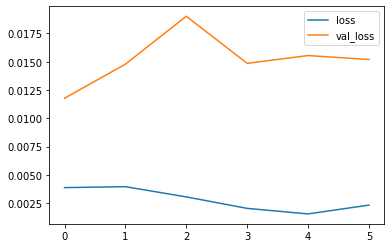

In [47]:
metrics_df[['loss','val_loss']].plot()

<AxesSubplot:>

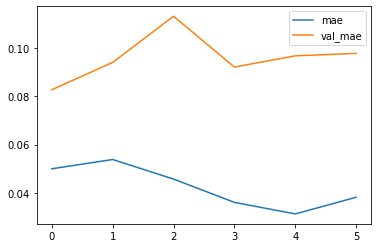

In [48]:
metrics_df[['mae','val_mae']].plot()

In [49]:
model.evaluate_generator(test_generator, verbose=0)

D:\Boby2020\ProgramFiles\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.015200252644717693, 0.09775996953248978]

In [50]:
predictions=model.predict_generator(test_generator)

D:\Boby2020\ProgramFiles\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [51]:
predictions.shape[0]

225

### We are creating a dataframe with predictions and X_test data

In [53]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:,1:][win_length:])],axis=1)

In [54]:
df_pred

,0,0,1,2,3,4
0,0.307386,0.373350,0.360110,0.379763,0.348205,0.354954
1,0.311804,0.369344,0.364225,0.369751,0.277868,0.371234
2,0.317482,0.373735,0.370179,0.381890,0.312045,0.372035
3,0.324137,0.370317,0.363836,0.371602,0.237715,0.376220
4,0.331482,0.411901,0.398068,0.396397,0.362372,0.411609
...,...,...,...,...,...,...
220,0.710935,0.958619,0.970702,0.963909,0.171170,0.956556
221,0.713284,0.952262,0.928984,0.934915,0.225352,0.960652
222,0.714399,0.964941,0.954041,0.946529,0.153849,0.977302
223,0.714759,0.960956,0.942356,0.964219,0.241362,0.933598


### In our next step we are reverse transforming our data frame which we created in our earlier step using the same MinMax Scaler that we used to transform previously

In [55]:
rev_trans=scaler.inverse_transform(df_pred)

In [56]:
rev_trans

array([[1.11705921e+03, 1.22500000e+03, 1.18223000e+03, 1.22100000e+03,
        2.38732900e+06, 1.18651000e+03],
       [1.12350877e+03, 1.21907000e+03, 1.18816000e+03, 1.20650000e+03,
        1.97513500e+06, 1.21028000e+03],
       [1.13180006e+03, 1.22557000e+03, 1.19674000e+03, 1.22408000e+03,
        2.17542100e+06, 1.21145000e+03],
       ...,
       [1.71131771e+03, 2.10078000e+03, 2.03813000e+03, 2.04183000e+03,
        1.24834900e+06, 2.09517000e+03],
       [1.71184413e+03, 2.09488000e+03, 2.02129000e+03, 2.06745000e+03,
        1.76120100e+06, 2.03136000e+03],
       [1.71125409e+03, 2.07100990e+03, 2.01606000e+03, 2.05052000e+03,
        2.07697400e+06, 2.03686000e+03]])

In [57]:
df_final=df_for_training[predictions.shape[0]*-1:]

In [58]:
df_final.count()

close       225
high        225
low         225
open        225
volume      225
adjClose    225
dtype: int64

In [59]:
df_final['close_Pred']=rev_trans[:,0]

<ipython-input-59-c2df12fb0efd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['close_Pred']=rev_trans[:,0]


In [60]:
df_final

,close,high,low,open,volume,adjClose,close_Pred
1034,1186.51,1225.0000,1182.23,1221.00,2387329.0,1186.51,1117.059206
1035,1210.28,1219.0700,1188.16,1206.50,1975135.0,1210.28,1123.508772
1036,1211.45,1225.5700,1196.74,1224.08,2175421.0,1211.45,1131.800065
1037,1217.56,1220.5100,1187.60,1209.18,1739828.0,1217.56,1141.515708
1038,1269.23,1282.0700,1236.93,1245.09,2470353.0,1269.23,1152.239893
...,...,...,...,...,...,...,...
1254,2064.88,2091.4200,2062.14,2067.00,1349856.0,2064.88,1706.260990
1255,2070.86,2082.0100,2002.02,2025.01,1667377.0,2070.86,1709.690588
1256,2095.17,2100.7800,2038.13,2041.83,1248349.0,2095.17,1711.317709
1257,2031.36,2094.8800,2021.29,2067.45,1761201.0,2031.36,1711.844128


<AxesSubplot:>

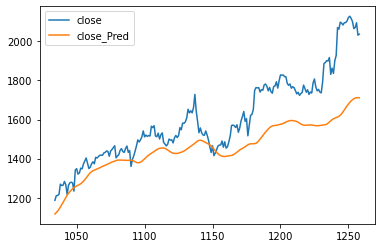

In [61]:
df_final[['close','close_Pred']].plot()

### From the above graph we can see our model is predicting google stock, it's not perfect but that can further improved with more experimentation

### Conclusion: We have successfully created an LSTM Model and predicted the google stock using Mean square error as loss and Mean Absolute error as metrics. We can further improve the model by expermenting with more LSTM Layers and changing Mean squared error to Mean Absolute percentage error. 
### Hyperparameters that can be tuned: Optimizers - 'SGD','Adam','RMSPROP' with better learning rates can be experimented with to improve the performance of the model